## Clasificación de dígitos escritos a mano


### Importar librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

### Descargar el conjunto de datos

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Exploración de los datos


In [ ]:
# Tamaño del conjunto de datos de entrenamiento
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
y_train.shape

(60000,)

In [ ]:
# Tamaño del conjunto de datos de prueba
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [ ]:
print('Valor mínimo: ',x_train.min())
print('Valor máximo: ', x_train.max())

Valor mínimo:  0
Valor máximo:  255


In [ ]:
# Reescalar  imágenes
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
print('Valor mínimo: ',x_train.min())
print('Valor máximo: ', x_train.max())

Valor mínimo:  0.0
Valor máximo:  1.0


In [ ]:
def visualize_dataset(n,x,y):
    plt.figure(figsize=(10,10))
    for i in range(n*n):
        plt.subplot(n,n,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i], cmap=plt.get_cmap('gray'))
        plt.xlabel(y[i])
    plt.show()

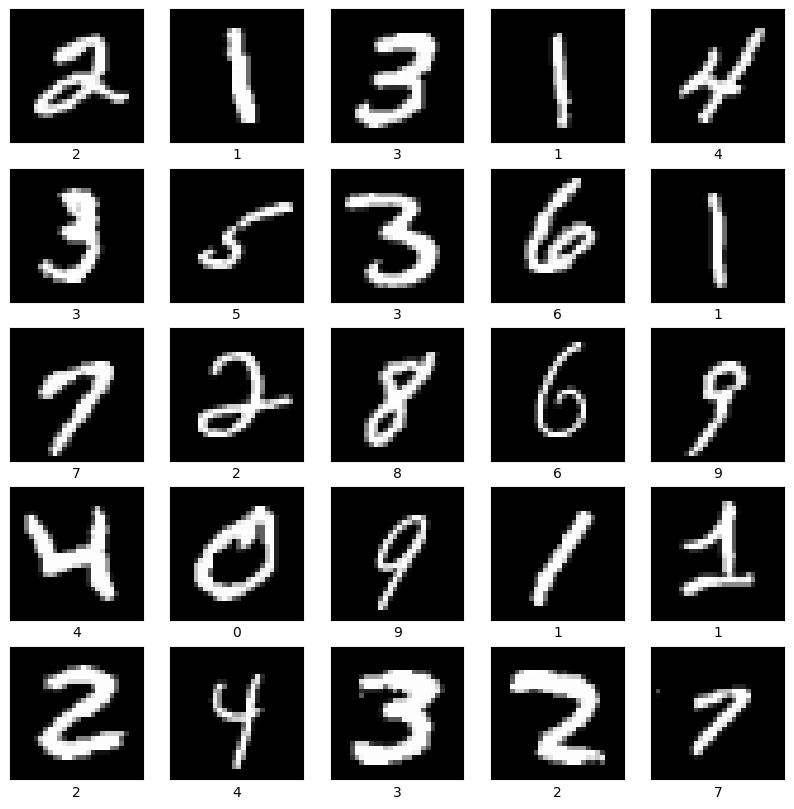

In [ ]:
visualize_dataset(5,x_train[5:30,:],y_train[5:30])

In [ ]:
def visualize_labels(y,visualize=False):
    unique, counts = np.unique(y, return_counts=True) # Encuentra los elementos únicos de un array
    print('Clases: ', unique)
    print('Número de instancias por clase', counts)

    if visualize == True:
        plt.figure(figsize=(11,5))
        plt.bar(unique,counts, color = (0.3,0.1,0.4,0.6))
        plt.xlabel('Clases')
        plt.ylabel('Frecuencia')
        plt.xticks(unique)

        for i, v in enumerate(counts):
            plt.text(i-0.25, v+10, str(v), color = 'blue')
        plt.show()


Clases:  [0 1 2 3 4 5 6 7 8 9]
Número de instancias por clase [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


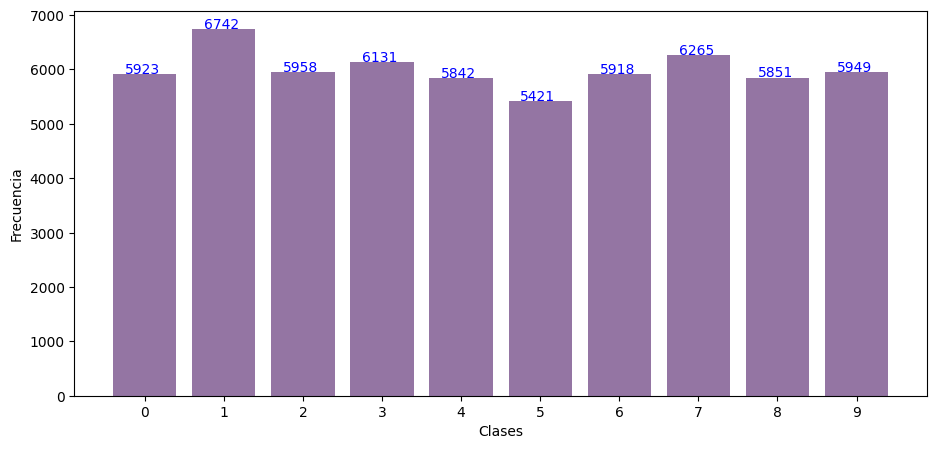

In [ ]:
visualize_labels(y_train, True)

### Definición del modelo

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

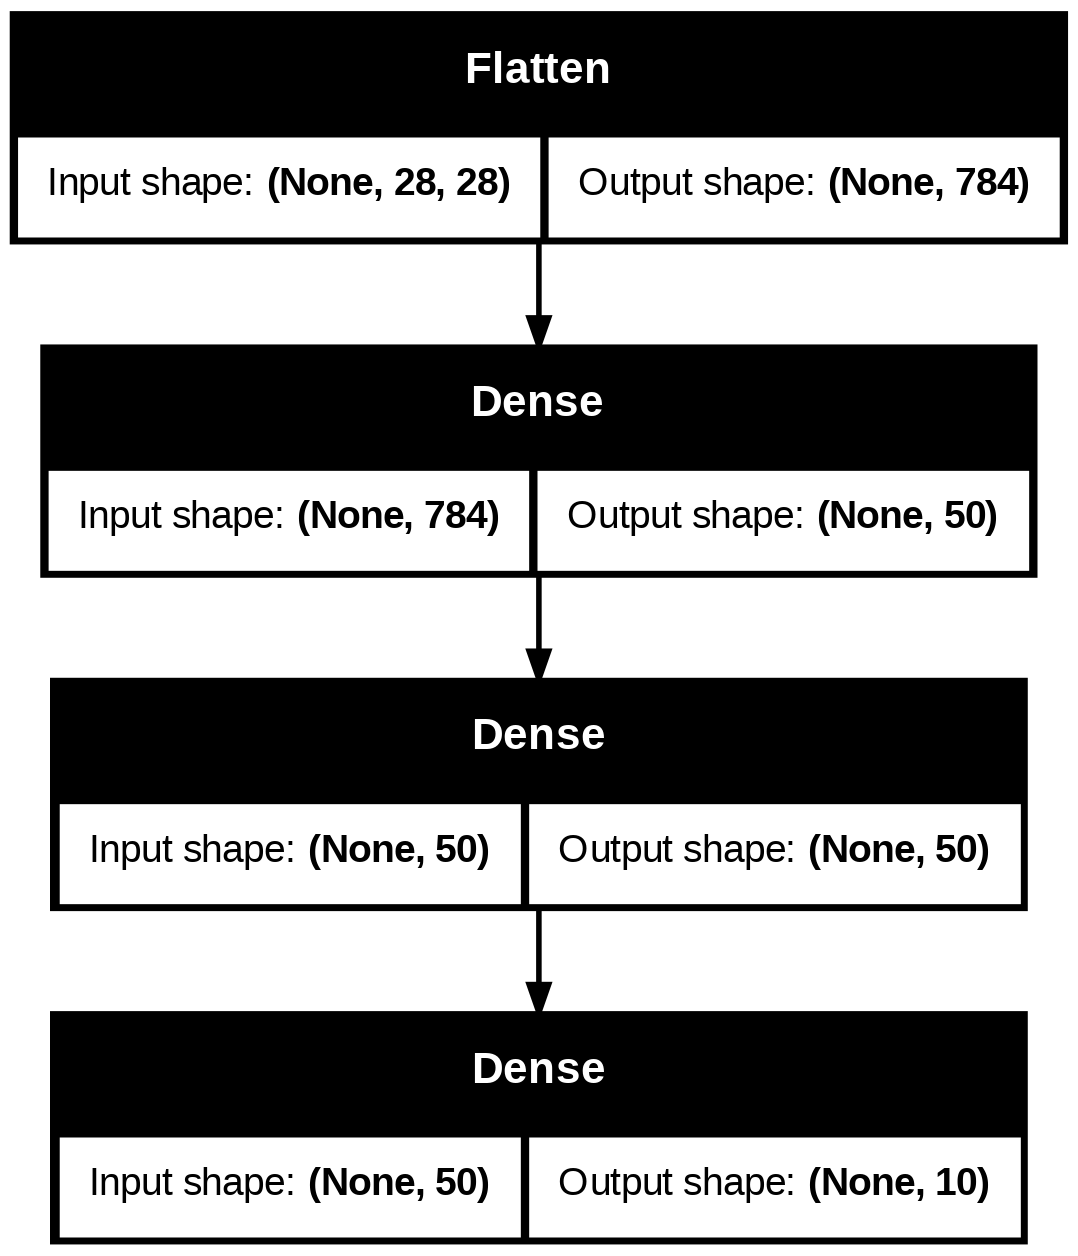

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=10,  mode='min',  verbose=1)
checkpoint = keras.callbacks.ModelCheckpoint("best_model_Mnist.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')


### Entrenamiento del modelo


In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[es, checkpoint] ,epochs=200,verbose=1)

Epoch 1/200
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8526 - loss: 0.5097
Epoch 1: val_loss improved from inf to 0.15912, saving model to best_model_Mnist.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8531 - loss: 0.5081 - val_accuracy: 0.9512 - val_loss: 0.1591
Epoch 2/200
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9563 - loss: 0.1434
Epoch 2: val_loss improved from 0.15912 to 0.11401, saving model to best_model_Mnist.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9564 - loss: 0.1434 - val_accuracy: 0.9653 - val_loss: 0.1140
Epoch 3/200
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9687 - loss: 0.1012
Epoch 3: val_loss improved from 0.11401 to 0.09764, saving model to best_model_Mnist.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9687 - loss: 0.1012 - val_accuracy: 0.9708 - val_loss: 0.0976
Epoch 4/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9738 - loss: 0.0806
Epoch 4: val_loss 

### Evaluación del modelo

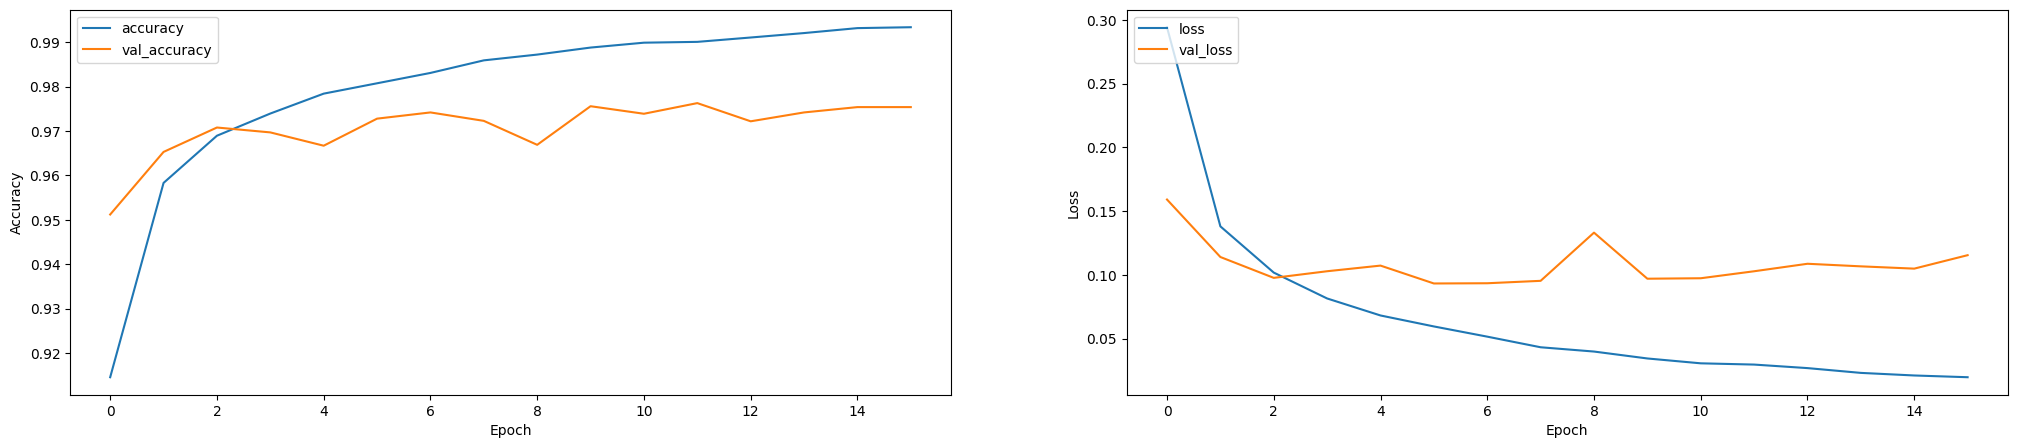

In [23]:
fig, axs = plt.subplots(1, 2,figsize=(25, 5))
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label = 'val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
#axs[0].set_ylim([0.89,0.92])
axs[0].legend(loc='upper left')

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label = 'val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
#axs[1].set_ylim([0.31, 0.37])
axs[1].legend(loc='upper left')
plt.show()

In [24]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=0)
print(f'Test accuracy: {test_acc:.2f}')
print(f'Test loss: {test_loss:.2f}')

Test accuracy: 0.98
Test loss: 0.12


In [33]:
# Guardar el modelo
model.save('mnist_model.keras')

In [34]:
model = load_model('mnist_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [35]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [36]:
y_pred

array([[1.9818338e-12, 1.5033290e-12, 4.6217028e-12, ..., 1.0000000e+00,
        6.1814677e-12, 2.0671606e-10],
       [4.6726983e-11, 1.2130680e-09, 1.0000000e+00, ..., 6.9370045e-16,
        1.5491778e-09, 9.3159126e-22],
       [8.9703132e-12, 9.9996459e-01, 2.2541551e-08, ..., 3.3074128e-05,
        1.0677227e-07, 1.8497666e-08],
       ...,
       [3.3696805e-20, 1.1844660e-15, 5.1761232e-18, ..., 2.3087140e-11,
        8.8490686e-16, 3.4535799e-07],
       [2.5746460e-17, 4.8624799e-19, 1.8302678e-14, ..., 2.4787835e-12,
        1.0048207e-10, 3.6013994e-15],
       [1.2791401e-17, 8.2626297e-17, 2.3870788e-17, ..., 4.1253597e-21,
        1.1361071e-18, 1.0145583e-16]], dtype=float32)

In [37]:
print(y_pred[1])

[4.6726983e-11 1.2130680e-09 1.0000000e+00 1.1910030e-10 2.5928641e-29
 6.4449658e-17 9.5130179e-18 6.9370045e-16 1.5491778e-09 9.3159126e-22]


In [38]:
# Suma de las salidas de softmax
print(np.sum(y_pred[1]))

1.0


In [39]:
y_pred = np.argmax(model.predict(x_test), axis=-1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [40]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

Matriz de confusión

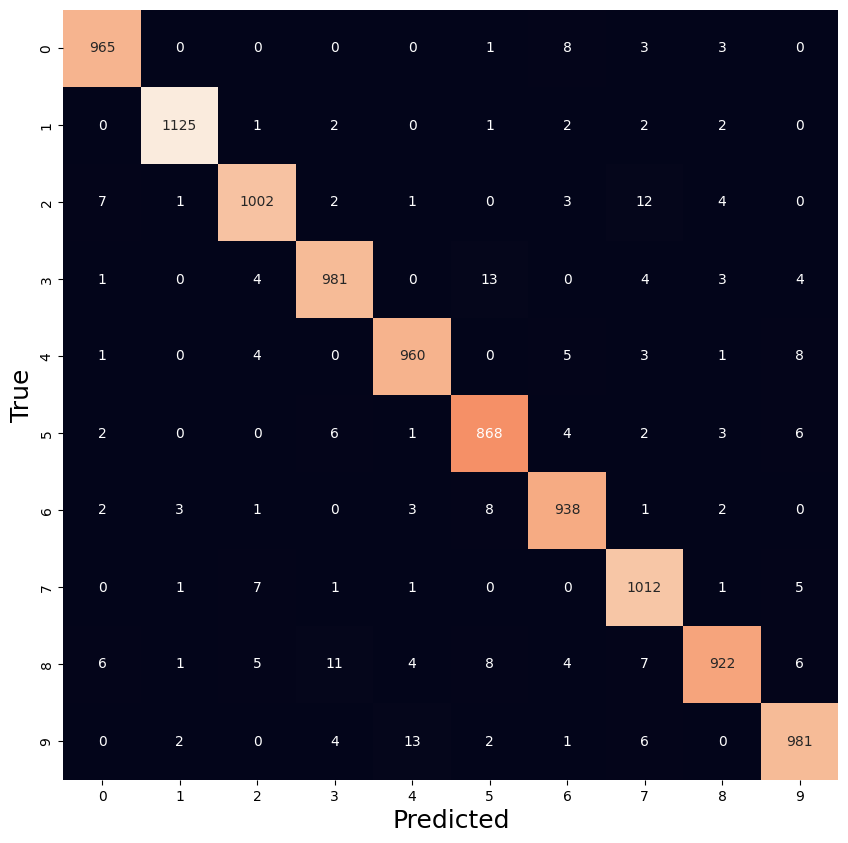

In [41]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cf_matrix, annot=True,cbar=False,fmt='d')
plt.xlabel("Predicted", fontsize = 18)
plt.ylabel("True", fontsize = 18)
plt.show()

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.95      0.96       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [43]:
def plot_prediction(index):
    print('Valor real: ',y_test[index])
    print('Predicción: ',y_pred[index])
    plt.figure(figsize=(6,3))
    plt.imshow(x_test[index], cmap='gray')
    plt.axis('off')
    plt.show()

Valor real:  9
Predicción:  9


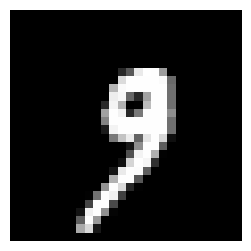

In [44]:
i = 1000
plot_prediction(i)